In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

lr = pd.read_csv("regLin2.csv")
lr

,X,y
0,99.320698,5939.441068
1,40.493010,1110.673401
2,55.350489,2346.004414
3,63.938261,2672.828947
4,54.209839,1371.676095
5,58.567857,2243.957468
6,73.800856,3385.903677
7,38.966794,1244.996258
8,35.206371,487.813781
9,71.143556,3544.184096


In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(lr[["X"]], lr[["y"]], train_size=0.75)
lm = LinearRegression()
lm
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
np.mean((lm.predict(X_test) - Y_test) ** 2)

y    278250.039114
dtype: float64

In [4]:
lm.coef_

array([[ 60.62622153]])

In [5]:
lm.intercept_

array([-950.36659037])

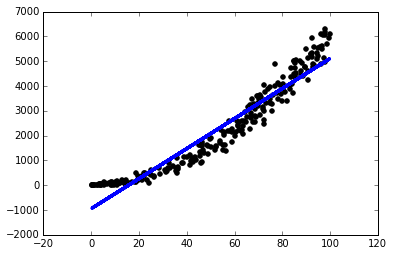

In [6]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, lm.predict(X_test), color='blue',linewidth=3)


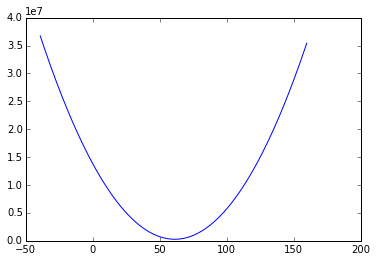

In [10]:
w0 = lm.intercept_[0]
w1 = lm.coef_[0][0]

W=range(-100,100,1) + w1
error =[]
for i in W:
    y_pred = i*X_test + w0
    C= np.subtract(y_pred, Y_test)
    C= C**2
    error.append(np.mean(C))

plt.plot(W,error)